# Swindon Earnings

This script was written to provide easy interpretation of earning statistics for Swindon. It has been initialised to load the data available [here](https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/methodologies/annualsurveyofhoursandearningslowpayandannualsurveyofhoursandearningspensionresultsqmi) The link allows an excel file to be downloaded.

Further to the earnings data, labour force data from the annual population survey is also extracted from Nomis [here](https://www.nomisweb.co.uk/).

I make no claim that this script is overly efficient, it was made for personal interest.

Any questions please contact:
> Andrew Paul Barnes<br>
> Doctoral Student & Teaching Assistant<br>
> Department of Architecture and Civil Engineering<br>
> University of Bath<br>
> a.p.barnes@bath.ac.uk

## Libraries

To begin several libraries are imported to allow easy manipulation of the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from scipy.stats import linregress
from matplotlib.lines import Line2D

## Loading Data Required

First we load the data from the file indicated by the *MASTER_FILE* variable.

In [3]:
MASTER_FILE = "2019.csv"
OCCUPTAION_FILE = "occupation.csv"

In [6]:
earnings_data = pd.read_csv(MASTER_FILE, delimiter=',')
occupation_data = pd.read_csv(OCCUPTAION_FILE, delimiter=',')

In [7]:
occupation_data

,Position,Year,numerator,denominator,percent,conf
0,"Managers, directors and senior officials",2004,"9,900","97,800",10.1,2.2
1,Professional occupations,2004,"16,100","97,800",16.5,2.7
2,Associate prof & tech occupations,2004,"14,500","97,800",14.8,2.6
3,Administrative and secretarial occupations,2004,"16,100","97,800",16.4,2.7
4,Skilled trades occupations,2004,"9,000","97,800",9.2,2.1
5,"Caring, leisure and other service occupations",2004,"5,900","97,800",6.0,1.7
6,Sales and customer service occupations,2004,"8,600","97,800",8.8,2.0
7,"Process, plant and machine operatives",2004,"6,900","97,800",7.0,1.8
8,Elementary occupations,2004,"10,800","97,800",11.1,2.3
9,"Managers, directors and senior officials",2005,"8,600","99,000",8.7,2.0


## Overview

To begin we look at the annual earnings for both full and part-time employees through time.

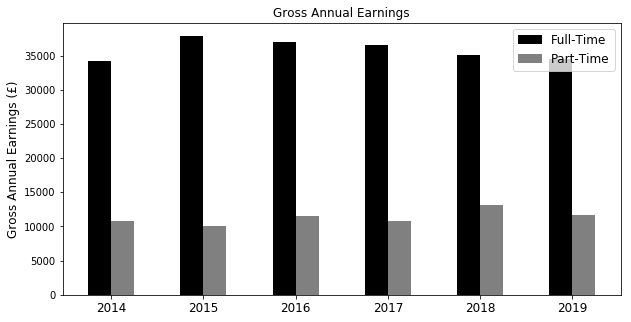

In [48]:
fig, all_axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

colours = ['k', 'grey']
bar_width = 0.25

work_types = ["Full-Time", "Part-Time"]

for yidx, year in enumerate(earnings_data['Year'].unique()):
    interested_data = earnings_data.loc[
        (
            earnings_data['Sex'] == "All"
        ) & (
            earnings_data['HoursAndEarnings'] == "Annual pay - Gross"
        ) & (
            earnings_data['Geography'] == "Swindon"
        ) & (
            earnings_data['Year'] == year
        ) & (
            earnings_data['AveragesAndPercentiles'] == "Mean"
        )
    ] 
    
    # Get and plot Full-Time annual salary
    val = interested_data.loc[interested_data['WorkingPattern'] == work_types[0]][['Figure']].iloc[0][0]
    ft = all_axs.bar(
        year-(bar_width/2),
        val,
        color='k',
        width=bar_width,
        label="Full-Time"
    )
    
    # Get and plot Part-Time annual salary
    val = interested_data.loc[interested_data['WorkingPattern'] == work_types[1]][['Figure']].iloc[0][0]
    pt = all_axs.bar(
        year+(bar_width/2),
        val,
        color='grey',
        width=bar_width,
        label="Part-Time"
    )

all_axs.set_title("Gross Annual Earnings", fontsize=12)
all_axs.set_ylabel("Gross Annual Earnings (£)", fontsize=12)
all_axs.set_xticks(earnings_data['Year'].unique())
all_axs.set_xticklabels(earnings_data['Year'].unique(), fontsize=12)
#all_axs.set_xlim(1, 5)

all_axs.legend([ft, pt], work_types, fontsize=12)

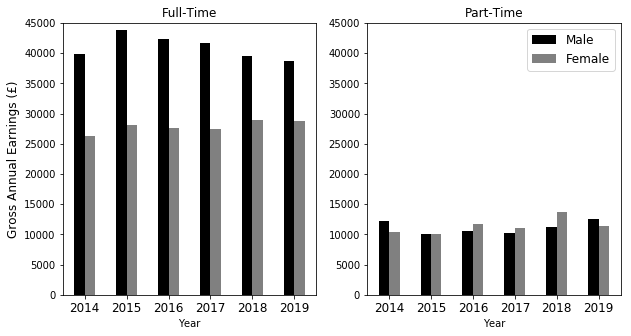

In [66]:
fig, all_axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

colours = ['k', 'grey']
bar_width = 0.25

sexes = ["Male", "Female"]
work_types = ["Full-Time", "Part-Time"]

for widx, work in enumerate(work_types):
    for yidx, year in enumerate(earnings_data['Year'].unique()):
        interested_data = earnings_data.loc[
            (
                earnings_data['WorkingPattern'] == work
            ) & (
                earnings_data['HoursAndEarnings'] == "Annual pay - Gross"
            ) & (
                earnings_data['Geography'] == "Swindon"
            ) & (
                earnings_data['Year'] == year
            ) & (
                earnings_data['AveragesAndPercentiles'] == "Mean"
            )
        ] 

        # Get and plot Full-Time annual salary
        val = interested_data.loc[interested_data['Sex'] == sexes[0]][['Figure']].iloc[0][0]
        ft = all_axs[widx].bar(
            year-(bar_width/2),
            val,
            color='k',
            width=bar_width,
            label="Full-Time"
        )

        # Get and plot Part-Time annual salary
        val = interested_data.loc[interested_data['Sex'] == sexes[1]][['Figure']].iloc[0][0]
        pt = all_axs[widx].bar(
            year+(bar_width/2),
            val,
            color='grey',
            width=bar_width,
            label="Part-Time"
        )

all_axs[0].set_title("Full-Time", fontsize=12)
all_axs[0].set_ylabel("Gross Annual Earnings (£)", fontsize=12)
all_axs[0].set_xticks(earnings_data['Year'].unique())
all_axs[0].set_xticklabels(earnings_data['Year'].unique(), fontsize=12)
all_axs[0].set_ylim([0, 45000])
all_axs[0].set_xlabel("Year")

all_axs[1].set_title("Part-Time", fontsize=12)
all_axs[1].set_xticks(earnings_data['Year'].unique())
all_axs[1].set_xticklabels(earnings_data['Year'].unique(), fontsize=12)
all_axs[1].set_ylim([0, 45000])
all_axs[1].set_xlabel("Year")
#all_axs.set_xlim(1, 5)

all_axs[widx].legend([ft, pt], sexes, fontsize=12, loc='upper right')

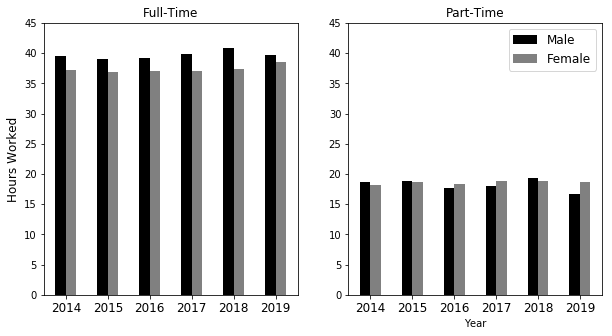

In [64]:
fig, all_axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

colours = ['k', 'grey']
bar_width = 0.25

sexes = ["Male", "Female"]
work_types = ["Full-Time", "Part-Time"]

for widx, work in enumerate(work_types):
    for yidx, year in enumerate(earnings_data['Year'].unique()):
        interested_data = earnings_data.loc[
            (
                earnings_data['WorkingPattern'] == work
            ) & (
                earnings_data['HoursAndEarnings'] == "Paid hours worked - Total"
            ) & (
                earnings_data['Geography'] == "Swindon"
            ) & (
                earnings_data['Year'] == year
            ) & (
                earnings_data['AveragesAndPercentiles'] == "Mean"
            )
        ] 

        # Get and plot Full-Time annual salary
        val = interested_data.loc[interested_data['Sex'] == sexes[0]][['Figure']].iloc[0][0]
        ft = all_axs[widx].bar(
            year-(bar_width/2),
            val,
            color='k',
            width=bar_width,
            label="Full-Time"
        )

        # Get and plot Part-Time annual salary
        val = interested_data.loc[interested_data['Sex'] == sexes[1]][['Figure']].iloc[0][0]
        pt = all_axs[widx].bar(
            year+(bar_width/2),
            val,
            color='grey',
            width=bar_width,
            label="Part-Time"
        )

all_axs[0].set_title("Full-Time", fontsize=12)
all_axs[0].set_ylabel("Hours Worked", fontsize=12)
all_axs[0].set_xticks(earnings_data['Year'].unique())
all_axs[0].set_xticklabels(earnings_data['Year'].unique(), fontsize=12)
all_axs[0].set_ylim([0, 45])
all_axs[1].set_xlabel("Year")


all_axs[1].set_title("Part-Time", fontsize=12)
all_axs[1].set_xticks(earnings_data['Year'].unique())
all_axs[1].set_xticklabels(earnings_data['Year'].unique(), fontsize=12)
all_axs[1].set_ylim([0, 45])
all_axs[1].set_xlabel("Year")
#all_axs.set_xlim(1, 5)

all_axs[widx].legend([ft, pt], sexes, fontsize=12, loc='upper right')

## Occupations Overview

Next, an overview of the occupations through time is given.

In [8]:
occupation_data

,Position,Year,numerator,denominator,percent,conf
0,"Managers, directors and senior officials",2004,"9,900","97,800",10.1,2.2
1,Professional occupations,2004,"16,100","97,800",16.5,2.7
2,Associate prof & tech occupations,2004,"14,500","97,800",14.8,2.6
3,Administrative and secretarial occupations,2004,"16,100","97,800",16.4,2.7
4,Skilled trades occupations,2004,"9,000","97,800",9.2,2.1
5,"Caring, leisure and other service occupations",2004,"5,900","97,800",6.0,1.7
6,Sales and customer service occupations,2004,"8,600","97,800",8.8,2.0
7,"Process, plant and machine operatives",2004,"6,900","97,800",7.0,1.8
8,Elementary occupations,2004,"10,800","97,800",11.1,2.3
9,"Managers, directors and senior officials",2005,"8,600","99,000",8.7,2.0


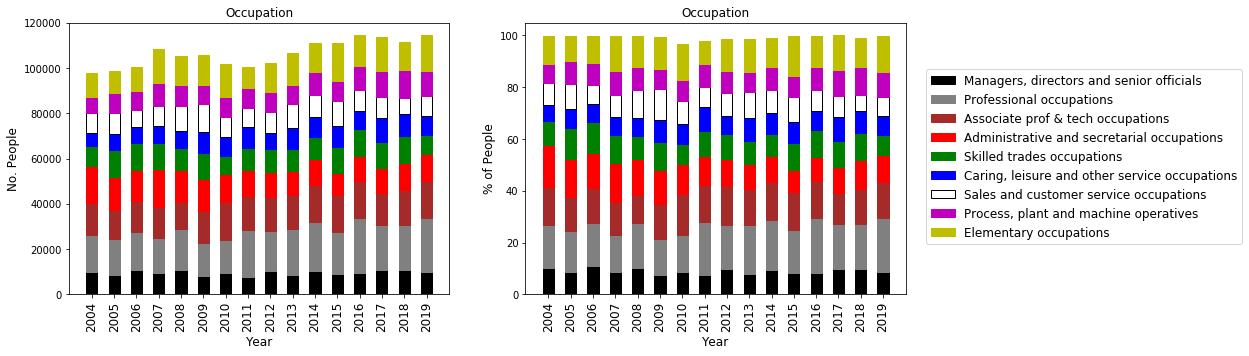

In [88]:
fig, all_axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

colours = ['k', 'grey', 'brown', 'r', 'g', 'b', 'w', 'm', 'y']
bar_width = 0.5

for yidx, year in enumerate(occupation_data['Year'].unique()):
    interested_data = occupation_data.loc[occupation_data['Year'] == year]
    bot_tot = 0
    bot_perc = 0
    bars = []
    for oidx, occupation in enumerate(interested_data['Position'].unique()):
        # Get value
        val = float(
            interested_data.loc[interested_data['Position'] == occupation][['numerator']].iloc[0][0].replace(',', ''))
        bars.append(all_axs[0].bar(
            year,
            val,
            color=colours[oidx],
            width=bar_width,
            bottom=bot_tot,
            label=occupation,
            edgecolor=colours[oidx] if colours[oidx] != 'w' else 'k',
            linewidth=1
        ))
        # Update position
        bot_tot = bot_tot + val
        
        # Get value
        val = float(
            interested_data.loc[interested_data['Position'] == occupation][['percent']].iloc[0][0])
        all_axs[1].bar(
            year,
            val,
            color=colours[oidx],
            width=bar_width,
            bottom=bot_perc,
            label=occupation,
            edgecolor=colours[oidx] if colours[oidx] != 'w' else 'k',
            linewidth=1
        )
        # Update position
        bot_perc = bot_perc + val

all_axs[0].set_xticks(occupation_data['Year'].unique())
all_axs[0].set_xticklabels(occupation_data['Year'].unique(), rotation=90, fontsize=12)
all_axs[0].set_title("Occupation", fontsize=12)
all_axs[0].set_ylabel("No. People", fontsize=12)
all_axs[0].set_xlabel("Year", fontsize=12)

all_axs[1].set_xticks(occupation_data['Year'].unique())
all_axs[1].set_xticklabels(occupation_data['Year'].unique(), rotation=90, fontsize=12)
all_axs[1].set_title("Occupation", fontsize=12)
all_axs[1].set_ylabel("% of People", fontsize=12)
all_axs[1].set_xlabel("Year", fontsize=12)

all_axs[0].legend(bars, interested_data['Position'].unique(), bbox_to_anchor=(3.1, 0.85), fontsize=12)